From https://github.com/eteq/ginga-nb-test

In [1]:
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.wcs import WCS
from astropy import visualization
from astropy.utils import data

In [2]:
import os
import ipywidgets

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#datafn = data.download_file('http://www.stsci.edu/~etollerud/jclj01tvq_flc.fits.gz', cache=False)
datafn = '/home/simon/data/UDF/1.0b1/IMAGE_UDF-10.fits'

If the link no longer works, you can try to get the file from MAST by searching on for Proposal ID 13745

In [20]:
with fits.open(datafn) as ff:
    print(list(enumerate([hdu.name for hdu in ff])))
    wcs = WCS(ff[1], ff)
    d = nddata.CCDData(data=ff[1].data, uncertainty=ff[2].data, unit=u.count, wcs=wcs, mask=np.isnan(ff[1].data))

INFO:astropy:array provided for uncertainty; assuming it is a StdDevUncertainty.


[(0, 'PRIMARY'), (1, 'DATA'), (2, 'STAT')]
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]


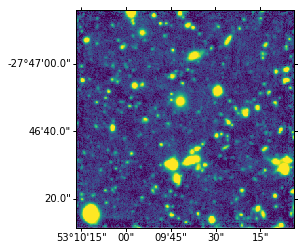

In [6]:
ax = plt.subplot(projection=wcs)

plt.imshow(d.data, 
           norm=visualization.ImageNormalize(d.data, 
                                             interval=visualization.PercentileInterval(95), 
                                             stretch=visualization.AsinhStretch()))
ax.coords[1].set_ticks(spacing = 20*u.arcsec)
ax.coords[1].set_major_formatter('dd:mm:ss.s')

# Baseline test 

In [7]:
import ginga
from ginga.web.jupyterw.ImageViewJpw import EnhancedCanvasView

In [18]:
# import requests
# image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Felis_silvestris_silvestris_small_gradual_decrease_of_quality.png/240px-Felis_silvestris_silvestris_small_gradual_decrease_of_quality.png"
# image = requests.get(image_url).content
# img = ipywidgets.Image(format='jpeg', width=500, height=500, value=image)
# img

In [16]:
img = ipywidgets.Image(format='jpeg', width=500, height=500)
img

Image(value=b'', format='jpeg', height='500', width='500')

In [17]:
v1 = EnhancedCanvasView()
v1.set_widget(img)
v1.get_bindings().enable_all(True)

v1.set_cmap(ginga.cmap.get_cmap('viridis'))

v1.load_data(d.data)

In [22]:
data_btn = ipywidgets.Button(description='data')
unc_btn = ipywidgets.Button(description='unc')
flag_btn = ipywidgets.Button(description='flags')
autocut = ipywidgets.Checkbox(description='autocut')
text = ipywidgets.Text('No cursor')

def update(newdata):
    oldpan = v1.get_pan()
    oldzoom = v1.get_zoom()
    
    v1.load_data(newdata)
    if autocut.value:
        v1.auto_levels()
    
    v1.set_pan(*oldpan)
    v1.zoom_to(oldzoom)

def data_click(button):
    update(d.data)
def unc_click(button):
    update(d.uncertainty.array)
def flag_click(button):
    update(d.flags)
    
data_btn.on_click(data_click)
unc_btn.on_click(unc_click)
flag_btn.on_click(flag_click)

hbox = ipywidgets.HBox([data_btn, unc_btn, flag_btn, autocut, text])
vbox = ipywidgets.VBox([img, hbox])
vbox

VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xf4\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf9y\xed\xe6\xd3.l\xa0{\xc9g\x92y\x0b\tcb\x821\xc7P\x0f\xd75\xb1c\xa0\xdcMf\xec\xba\x92\x82\xb3\x99fs\xc9\x92=\xceJ1\xcev\x80@\xcf8\x03\xa5\x1a\xce\xab?\x88pcA\x0c\xf6\xb2\x96?.\x1f\xef\x02\n\x8eA\x19S\xd4z\xd5\xfd\'K\x95f\xb4\xba*\xf2\xcb)\xdc\x0b\x8ewn\x1b\xb2\x00\x1d\xeb\xf5V\xdf-\xde\x8c\xf0\xb18\x9a\xab\x0e\xa7Q\xa8O[\xabE\xea\xae\xd7D\xado\xca\xfb\xed\x99k\xa2[4\xbfh\xd3$\xb2I]\xe4[\x85EV\xf3\x90>\x1a>\x87qb;\x8c\xf5\xf7\xafE\xf0w\x82\xff\x00\xb4\xa1\xb0\xd3lto\xf4\x83\x94X\xedQ\xa6\n\xc6C\x86#\x03\x03\xe6\x1d\xbf\x9dzg\xc1\xdf\xd9\xdeo\x88\x17\x91\xde\xea1\\\xdb\xe9\x13\x01;M\xf3F\x18\x896\xba\xa3l \x9f\xbf\xc6{{W\xda>\x1d\xf0\xe5\x8f\x85t\xa8\xf4\xed:&\x8a\xd5\x19\x98+9c\x92ry5\xf8?\x1a\xf8\xa1\x82\xe1\xea\x9fS\xc1\xc7\xdbW[\xab\xda1\xf5j\xf7w\xfb6\xf5h\xc3\x07\x96c8\x92\n|\xee\x9d\x15\xf6\x9a|\xcd\xae\x89]s%v\xb9\x9e\x9b%t\xd9\xf1\x1d\xef\xec\xe5\xac\xdb[\xb5\xd5\xaf\x87\x19\x00P\nGg*H_v2\x14\'M\xb8\xefQ\x8f\xd9\xcf\xc4\xfa\x81\x8d\x1fL\xb8dX\x86\xd9\x0cw\x08\x0f\xd0\x85\xeb\xcd}\xe7E~.\xbch\xce\xe3\x1b{\x08_\xbd\xe4{+\x81`\x9a\x7f\\\xa9\xa7u\x16\xfe\xf6\xd9\xf9m\xe2\xcf\x01\\i\xcf0\xb9\xb3\x7f)a\t0\xda\xfb\x99Ie\xdb\x828\x1c\x9c\x9c\xf7>\x95\xcbxsY\xd1\xfc1\xa8\xd9\xe9\xf7:m\xd3\xc5\x14\xcd\xb5\x8b\x94\x8971e\xc9-\xc6\x0b.=\xc5}\x85\xfbU\xfc>\xb7\xb6\xd6"\xd4\xec!t{\x9bi\x1e\xe1\x8b3\x02\xdb\xc98\xea\x01;\xcf\x1fJ\xf8\xff\x00\xc46-k~\xac\x88\x17\xc9`\xcd\xf6\x9c\x80[\x82\xbd;\x03_\xd6</\x9eS\xe2l\xa6\x96::s\xadWT\xf5Mo\xdd;y[c\xe60\xaa~\xda\xbeO\x8e\x9b\x93\x85\xd6\x8d\xc7\xa6\x8f\xe6\xa5\xf8\xb5\xb2\xd7\xd8\xfe2x\xfb\xc2s\xfc:\xf0\xd5\xbe\x8d\xa0\xc7k\xa8C\x0f\xfaD\xd6\xb1\xc73L\xed\x10;\x98\xf5\xce\xec\x9es\xc9>\x95\xf2\xa5\xce\xbb\x1e\xa7\x7f\xa7"\xe9\xe6\xd6w\x9dE\xc8h\x14\x82\x99\x03\x18\xc7\xa7\xb0\xae\x9b\xc4\xba\xa5\xe3$\x08\xf6\xd1\xcc7\x89$hU\x8a\xe3\x1ds\x9e\x80\x1a\xa1{\xe7\xdd_\xccL\xf6\xf0[y-\xf6{\x92\xd8\n\xff\x00/\xdf\'+\x8c\xe4\xf1\xce\x17\x

In [ ]:
#ff = fits.open('/Users/erik/projects/piscdwarfs_hst/raw/jclj01tvq_flc.fits')
#v1.get_image().wcs.load_header(ff[4].header, ff)

In [25]:
v1.cut_levels(-1, 5)

In [26]:
v1.set_pan(150,150)

In [27]:
v1.zoom_to(2)

In [28]:
v1.markl(100, 100, 'circle')

AttributeError: 'EnhancedCanvasView' object has no attribute 'markl'

In [29]:
arg = []

def f(*args, **kwargs):
    arg.append((args, kwargs))
    data_x, data_y = args[2:4]
    ra, dec = wcs.all_pix2world(data_x, data_y, 0)
    text.value = '{:.4},{:.4}'.format(float(ra), float(dec))

v1.add_callback('cursor-changed', f)

# Experiments with widgets 

In [30]:
text =['first', 'second']
button = ipywidgets.Button(description="Click Me!")
button.i = 0

def on_button_clicked(b):
    b.description = text[b.i % len(text)] + str(b.i)
    b.i += 1

button.on_click(on_button_clicked)
button

Button(description='Click Me!', style=ButtonStyle())

In [31]:
text.append('third')
on_button_clicked(button)

# Test below 

In [32]:
%%javascript
/* some magic to keep the cell contents from scrolling
 */
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [33]:
# create the beginnings of an image viewing application
import requests
image_url = "http://madamsabi.com/image/cache/data/catfish-500x500.jpg"
image = requests.get(image_url).content
jup_img = ipywidgets.Image(format='jpeg', width=500, height=500, value=image)

zoom = ipywidgets.FloatSlider(min=-20, max=20, step=1, continuous_update=True,
                          orientation='horizontal')
ipywidgets.VBox([jup_img, zoom])

VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 90\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xf4\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xfdS\xa2\xb8\xbf\xf8]\x9f\x0e\xf3\x8f\xf8O|1\x9f\xfb\x0c[\xff\x00\xf1t\xbf\xf0\xba\xbe\x1e\xff\x00\xd0\xf9\xe1\x9f\xfc\x1c[\xff\x00\xf1t\x01\xd9\xd1\\o\xfc.\x7f\x87\xc3\xfeg\xaf\r\x7f\xe0\xde\xdf\xff\x00\x8b\xa0|h\xf8|zx\xef\xc3\'\xfe\xe3\x16\xff\x00\xfc]\x02\xba;*+\x8a?\x1b\xbe\x1d\x03\x83\xe3\xef\x0b\xe7\xd3\xfbf\xdb\xff\x00\x8b\xa3\xfe\x17w\xc3\xaf\xfa\x1f\xbc1\xff\x00\x83\x9bo\xfe.\x80\xb9\xda\xd1\\Q\xf8\xdd\xf0\xe8u\xf1\xf7\x86\x07\xfd\xc6m\xbf\xf8\xbar|j\xf8{\'\xdc\xf1\xe7\x86_\xfd\xddb\xdc\xff\x00\xec\xf4\x05\xd1\xd9\xd1\\y\xf8\xc9\xe0\x05\x1c\xf8\xe3\xc3c\xeb\xab\xdb\xff\x00\xf1t/\xc6?\x00\xbf\xdd\xf1\xc7\x86\xdb\xe9\xab[\x9f\xfd\x9e\x80\xba;\n+\x96O\x8a\xbe\n\x94\xe1<a\xa09\xf4]N\x03\xff\x00\xb3U\x84\xf8\x89\xe1I>\xef\x89\xf4f\xfa_\xc4\x7f\xf6jvc:\x1a+\x9f\xff\x00\x85\x85\xe1a\xff\x003.\x8f\xff\x00\x81\xf1\x7f\xf1Uf?\x17hS x\xf5\xad9\xd0\xf4e\xba\x8c\x8f\xe7E\x98\xae\x8dz+\x1f\xfe\x13\x1d\x038\xfe\xdc\xd3s\xe9\xf6\xb8\xff\x00\xc6\xac\xc1\xafi\x978\xf2u\x1bIs\xfd\xc9\xd5\xbf\x91\xa2\xcc.\x8b\xf4T?k\x80\x0c\xf9\xd1\xe3\xd7x\xa8\xff\x00\xb5,\xf7c\xedpg\xd3\xcc_\xf1\xa2\xcc.\x8bTS\x12T\x94e\x1d\\z\xa9\xcd$\x97\x11E\xf7\xe5D\xff\x00y\x80\xa42J*\xb8\xbf\xb5=.a?I\x05H\xb3\xc6\xdd$C\xf4a@\x12QI\xb8c9\x1f\x9d4J\x84\xe0:\x93\xe9\x9a\x00}\x14\x99\xa3#\xd6\x80\x16\x8aL\xd1\x91\xea(\x01h\xa4\x0c\x0fB?:2=h\x01h\xa4\xcd\x19\xa0\x05\xa2\x934f\x80\x16\x8aL\x8a2=h\x01h\xa4\xcd\x19\xa0\x05\xa2\x934f\x80\x16\x8aL\xd1\x9a\x00Z)3Fh\x01h\xa4\xcd\x19\xa0\x05\xa2\x934f\x80\x16\x8aL\xd2\xd0\x01E\x14\x99\xa0\x05\xa2\x92\x8c\xd0\x02\xd1E%\x00-\x14\x94f\x80\x16\x8a)\t\x00d\x9e(\x01h\xa8Z\xf2\x048i\xe3S\xe8\\S\x9ax\x91w4\x88\xab\xeaXb\x80$\xa2\xa0\xfbu\xb7\xfc\xfcE\xff\x00}\x8a(\x03\xf1\xbe[\x7f.`1W-\xe0\\\x16oj~\xab\x1a\xc0\xfb\xb7\x02}\xab6}^4\x8f\x07\x83\xdb\x9a\xd9\x1c\xf2z\x1a\x0e\xf1t\xc8\xaa\x977\xf1\xa3\x15\x8e

In [34]:
# Connect a Ginga viewer to this image widget
from ginga.misc.log import get_logger
logger = get_logger("my viewer", log_stderr=False, 
                    log_file=os.path.join(os.environ['HOME'],'ginga.log'), 
                    level=40)

from ginga.web.jupyterw.ImageViewJpw import EnhancedCanvasView
v1 = EnhancedCanvasView(logger=logger)
# set our linkage between the jupyter widget at ginga
v1.set_widget(jup_img)

# enable all possible keyboard and pointer operations
bd = v1.get_bindings()
bd.enable_all(True)

In [35]:
from ginga.misc.log import get_logger

In [36]:
v1.get_pan()

(1.0, 1.0)